In [1]:
from environments import ZeroDCleanupEnv
import numpy as np
from tqdm import tqdm

2023-11-22 00:56:49,073	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
num_episodes = 100
verbose_episode = num_episodes - 1
steps_per_episode = 1000
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]
action_size = 2

In [3]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10

area = 150

In [4]:
env = ZeroDCleanupEnv(agent_ids, 
                      num_agents=num_agents, 
                      area=area, 
                      thresholdDepletion=thresholdDepletion,
                      thresholdRestoration=thresholdRestoration,
                      wasteSpawnProbability=wasteSpawnProbability,
                      appleRespawnProbability=appleRespawnProbability,
                      dirt_multiplier=dirt_multiplier,
                      use_heuristic=False)

In [5]:
test_stats = []
for episode in range(num_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })
    
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    print(f"info: {info}")

    for step in tqdm(range(steps_per_episode)):
        num_pickers = round(0.6 * num_agents)
        pickers = agent_ids[:num_pickers]
        cleaners = agent_ids[num_pickers:]
        
        actions = { agent_id: 0 for agent_id in agent_ids if agent_id in pickers }
        actions.update({ agent_id: 1 for agent_id in agent_ids if agent_id in cleaners })
        next_states, rewards, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        reward = sum(rewards.values())

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")

    test_stats[-1]["total_reward"] = ending_reward


========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6996.14it/s]


ending reward: 2653
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 5966.53it/s]


ending reward: 2662
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7546.58it/s]


ending reward: 2713
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8394.83it/s]


ending reward: 2625
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8317.51it/s]


ending reward: 2734
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8778.48it/s]


ending reward: 2638
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8742.45it/s]


ending reward: 2774
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8665.33it/s]


ending reward: 2706
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7631.73it/s]


ending reward: 2709
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7039.13it/s]


ending reward: 2645
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8090.64it/s]


ending reward: 2717
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8059.31it/s]


ending reward: 2693
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7733.16it/s]


ending reward: 2681
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6835.77it/s]


ending reward: 2687
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7193.88it/s]


ending reward: 2756
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7769.85it/s]


ending reward: 2687
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7791.71it/s]


ending reward: 2742
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7748.33it/s]


ending reward: 2628
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7820.68it/s]


ending reward: 2767
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8268.76it/s]


ending reward: 2621
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8371.11it/s]


ending reward: 2703
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7954.39it/s]


ending reward: 2710
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7794.77it/s]


ending reward: 2770
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8328.45it/s]


ending reward: 2710
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6989.67it/s]


ending reward: 2632
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8782.09it/s]


ending reward: 2753
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8361.59it/s]


ending reward: 2612
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8322.51it/s]


ending reward: 2678
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7847.18it/s]


ending reward: 2550
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8373.86it/s]


ending reward: 2766
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8506.82it/s]


ending reward: 2661
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8286.61it/s]


ending reward: 2708
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7811.10it/s]


ending reward: 2549
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7790.51it/s]


ending reward: 2745
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8338.89it/s]


ending reward: 2690
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6675.39it/s]


ending reward: 2670
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8349.84it/s]


ending reward: 2711
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8346.00it/s]


ending reward: 2702
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8487.05it/s]


ending reward: 2642
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8131.21it/s]


ending reward: 2674
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7575.81it/s]


ending reward: 2720
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8169.78it/s]


ending reward: 2617
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8334.93it/s]


ending reward: 2601
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8301.69it/s]


ending reward: 2740
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7637.56it/s]


ending reward: 2709
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6137.76it/s]


ending reward: 2642
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8367.95it/s]


ending reward: 2631
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8005.51it/s]


ending reward: 2635
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8151.31it/s]


ending reward: 2772
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8259.27it/s]


ending reward: 2636
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7728.89it/s]


ending reward: 2718
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7500.78it/s]


ending reward: 2644
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8363.83it/s]


ending reward: 2551
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8857.48it/s]


ending reward: 2695
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8697.54it/s]


ending reward: 2689
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8575.03it/s]


ending reward: 2673
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8638.42it/s]


ending reward: 2688
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8309.14it/s]


ending reward: 2752
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8573.55it/s]


ending reward: 2737
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6963.62it/s]


ending reward: 2682
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7517.09it/s]


ending reward: 2677
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8345.30it/s]


ending reward: 2763
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7986.96it/s]


ending reward: 2695
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8315.31it/s]


ending reward: 2709
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 9050.79it/s]


ending reward: 2762
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8268.30it/s]


ending reward: 2647
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8242.78it/s]


ending reward: 2618
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7703.51it/s]


ending reward: 2745
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6884.38it/s]


ending reward: 2705
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4301.09it/s]


ending reward: 2646
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7667.34it/s]


ending reward: 2665
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8078.15it/s]


ending reward: 2781
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8212.41it/s]


ending reward: 2660
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8677.96it/s]


ending reward: 2636
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7904.61it/s]


ending reward: 2680
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7840.14it/s]


ending reward: 2692
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8226.76it/s]


ending reward: 2651
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8463.83it/s]


ending reward: 2667
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6076.16it/s]


ending reward: 2686
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8152.84it/s]


ending reward: 2735
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8518.15it/s]


ending reward: 2673
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8176.99it/s]


ending reward: 2685
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7949.32it/s]


ending reward: 2662
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8273.21it/s]


ending reward: 2621
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8188.48it/s]


ending reward: 2633
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7727.07it/s]


ending reward: 2702
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8315.51it/s]


ending reward: 2646
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7965.82it/s]


ending reward: 2804
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 6697.42it/s]


ending reward: 2662
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8214.71it/s]


ending reward: 2707
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8157.92it/s]


ending reward: 2684
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8323.77it/s]


ending reward: 2680
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8554.04it/s]


ending reward: 2807
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7711.83it/s]


ending reward: 2732
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8630.45it/s]


ending reward: 2712
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7459.44it/s]


ending reward: 2627
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8036.36it/s]


ending reward: 2683
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 7815.37it/s]


ending reward: 2584
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 5983.96it/s]


ending reward: 2726
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'0': 0, '3': 0, '6': 0, '1': 0, '9': 0, '4': 0, '8': 0, '2': 0, '5': 0, '7': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 8806.88it/s]

ending reward: 2742
========= End of Episode 99 =========


In [6]:
import matplotlib.pyplot as plt

Average reward: 2685.98


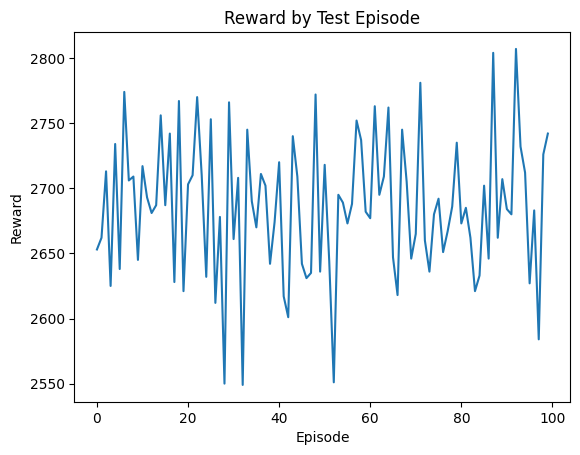

In [11]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
print(f"Average reward: {np.mean([stat['total_reward'] for stat in test_stats])}")
plt.show()

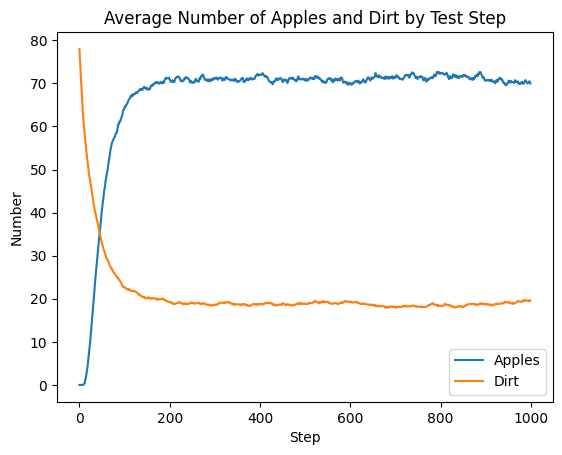

In [8]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(steps_per_episode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

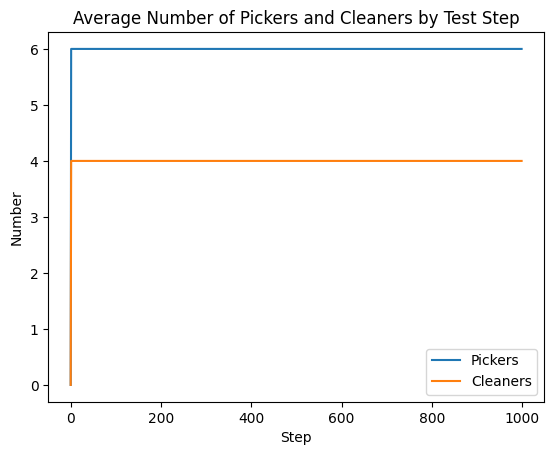

In [9]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(steps_per_episode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

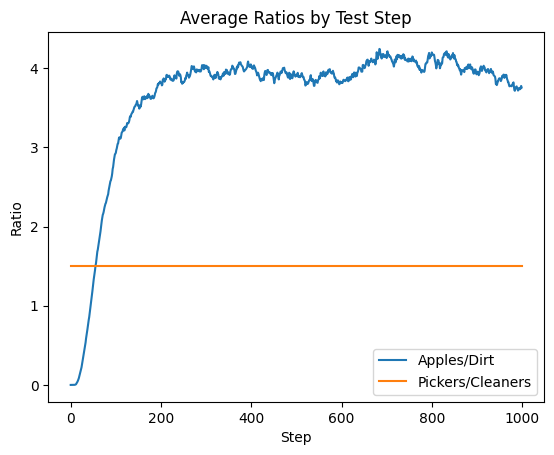

In [10]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(steps_per_episode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()